In [1]:
import zipfile
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from io import BytesIO

In [2]:
!ls /kaggle/input

flight-delay-dataset-20182022


In [3]:
!ls /kaggle/input/flight-delay-dataset-20182022

Airlines.csv		       Combined_Flights_2021.csv
Combined_Flights_2018.csv      Combined_Flights_2021.parquet
Combined_Flights_2018.parquet  Combined_Flights_2022.csv
Combined_Flights_2019.csv      Combined_Flights_2022.parquet
Combined_Flights_2019.parquet  raw
Combined_Flights_2020.csv      readme.html
Combined_Flights_2020.parquet  readme.md


In [4]:
#load the dataset
file_path = '/kaggle/input/flight-delay-dataset-20182022'
data1 = pd.read_csv('/kaggle/input/flight-delay-dataset-20182022/Airlines.csv')
data1.head()

,Code,Description
0,02Q,Titan Airways
1,04Q,Tradewind Aviation
2,05Q,"Comlux Aviation, AG"
3,06Q,Master Top Linhas Aereas Ltd.
4,07Q,Flair Airlines Ltd.


In [5]:
columns = data1.columns
len(columns)

2

In [6]:
#load the dataset
file_path = '/kaggle/input/flight-delay-dataset-20182022'
data2 = pd.read_csv('/kaggle/input/flight-delay-dataset-20182022/Combined_Flights_2021.csv')
data2.head()

,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,...,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings
0,2021-03-03,SkyWest Airlines Inc.,SGU,PHX,False,False,724,714.0,0.0,-10.0,...,724.0,813.0,5.0,843,-25.0,0.0,-2.0,0800-0859,2,0.0
1,2021-03-03,SkyWest Airlines Inc.,PHX,SGU,False,False,922,917.0,0.0,-5.0,...,940.0,1028.0,3.0,1040,-9.0,0.0,-1.0,1000-1059,2,0.0
2,2021-03-03,SkyWest Airlines Inc.,MHT,ORD,False,False,1330,1321.0,0.0,-9.0,...,1336.0,1445.0,16.0,1530,-29.0,0.0,-2.0,1500-1559,4,0.0
3,2021-03-03,SkyWest Airlines Inc.,DFW,TRI,False,False,1645,1636.0,0.0,-9.0,...,1703.0,1955.0,7.0,2010,-8.0,0.0,-1.0,2000-2059,4,0.0
4,2021-03-03,SkyWest Airlines Inc.,PHX,BFL,False,False,1844,1838.0,0.0,-6.0,...,1851.0,1900.0,3.0,1925,-22.0,0.0,-2.0,1900-1959,2,0.0


In [7]:
data2.columns

Index(['FlightDate', 'Airline', 'Origin', 'Dest', 'Cancelled', 'Diverted',
       'CRSDepTime', 'DepTime', 'DepDelayMinutes', 'DepDelay', 'ArrTime',
       'ArrDelayMinutes', 'AirTime', 'CRSElapsedTime', 'ActualElapsedTime',
       'Distance', 'Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek',
       'Marketing_Airline_Network', 'Operated_or_Branded_Code_Share_Partners',
       'DOT_ID_Marketing_Airline', 'IATA_Code_Marketing_Airline',
       'Flight_Number_Marketing_Airline', 'Operating_Airline',
       'DOT_ID_Operating_Airline', 'IATA_Code_Operating_Airline',
       'Tail_Number', 'Flight_Number_Operating_Airline', 'OriginAirportID',
       'OriginAirportSeqID', 'OriginCityMarketID', 'OriginCityName',
       'OriginState', 'OriginStateFips', 'OriginStateName', 'OriginWac',
       'DestAirportID', 'DestAirportSeqID', 'DestCityMarketID', 'DestCityName',
       'DestState', 'DestStateFips', 'DestStateName', 'DestWac', 'DepDel15',
       'DepartureDelayGroups', 'DepTimeBlk', 'TaxiOu

In [8]:
# getting shape of the dataset
data2.shape


(6311871, 61)

In [9]:
# Getting info about the dataset
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6311871 entries, 0 to 6311870
Data columns (total 61 columns):
 #   Column                                   Dtype  
---  ------                                   -----  
 0   FlightDate                               object 
 1   Airline                                  object 
 2   Origin                                   object 
 3   Dest                                     object 
 4   Cancelled                                bool   
 5   Diverted                                 bool   
 6   CRSDepTime                               int64  
 7   DepTime                                  float64
 8   DepDelayMinutes                          float64
 9   DepDelay                                 float64
 10  ArrTime                                  float64
 11  ArrDelayMinutes                          float64
 12  AirTime                                  float64
 13  CRSElapsedTime                           float64
 14  ActualElapsedTime 

In [10]:
# getting summary statistics of the data
data2.describe()

,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,ArrTime,ArrDelayMinutes,AirTime,CRSElapsedTime,ActualElapsedTime,Distance,...,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,DistanceGroup,DivAirportLandings
count,6.311871e+06,6.203546e+06,6.203458e+06,6.203458e+06,6.199463e+06,6.185870e+06,6.185870e+06,6.311870e+06,6.185870e+06,6.311871e+06,...,6.201518e+06,6.201518e+06,6.199446e+06,6.199446e+06,6.311871e+06,6.185870e+06,6.185870e+06,6.185870e+06,6.311871e+06,6.311869e+06
mean,1.323953e+03,1.326878e+03,1.276132e+01,9.468347e+00,1.476758e+03,1.252928e+01,1.105702e+02,1.405049e+02,1.344372e+02,7.955762e+02,...,1.619500e+01,1.349829e+03,1.471500e+03,7.683753e+00,1.498272e+03,3.290244e+00,1.726611e-01,-3.158285e-01,3.653994e+00,3.338472e-03
std,4.741972e+02,4.868330e+02,4.736319e+01,4.837844e+01,5.137709e+02,4.674770e+01,6.888632e+01,7.031368e+01,7.023792e+01,5.832931e+02,...,8.584121e+00,4.879919e+02,5.096815e+02,6.375447e+00,4.946565e+02,5.012311e+01,3.779540e-01,2.266604e+00,2.281563e+00,1.046246e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,-1.050000e+02,1.000000e+00,0.000000e+00,8.000000e+00,-2.920000e+02,1.400000e+01,3.100000e+01,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-1.070000e+02,0.000000e+00,-2.000000e+00,1.000000e+00,0.000000e+00
25%,9.200000e+02,9.230000e+02,0.000000e+00,-6.000000e+00,1.105000e+03,0.000000e+00,6.000000e+01,9.000000e+01,8.300000e+01,3.700000e+02,...,1.100000e+01,9.380000e+02,1.101000e+03,4.000000e+00,1.118000e+03,-1.600000e+01,0.000000e+00,-2.000000e+00,2.000000e+00,0.000000e+00
50%,1.315000e+03,1.321000e+03,0.000000e+00,-2.000000e+00,1.509000e+03,0.000000e+00,9.400000e+01,1.240000e+02,1.180000e+02,6.460000e+02,...,1.400000e+01,1.334000e+03,1.505000e+03,6.000000e+00,1.520000e+03,-7.000000e+00,0.000000e+00,-1.000000e+00,3.000000e+00,0.000000e+00
75%,1.723000e+03,1.729000e+03,6.000000e+00,6.000000e+00,1.909000e+03,6.000000e+00,1.400000e+02,1.700000e+02,1.650000e+02,1.033000e+03,...,1.900000e+01,1.743000e+03,1.904000e+03,9.000000e+00,1.914000e+03,6.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00,0.000000e+00
max,2.359000e+03,2.400000e+03,3.095000e+03,3.095000e+03,2.400000e+03,3.089000e+03,7.110000e+02,1.312000e+03,7.940000e+02,5.812000e+03,...,2.560000e+02,2.400000e+03,2.400000e+03,2.510000e+02,2.400000e+03,3.089000e+03,1.000000e+00,1.200000e+01,1.100000e+01,9.000000e+00


In [12]:
# Getting the airport codes 
origin_airtport_city = data2['Origin'].unique()
origin_airtport_city

array(['SGU', 'PHX', 'MHT', 'DFW', 'ORD', 'PSP', 'LBB', 'FWA', 'DRO',
       'LAX', 'SFO', 'JLN', 'SAF', 'ASE', 'HRL', 'DTW', 'GJT', 'SLC',
       'FSM', 'FLG', 'GNV', 'ROW', 'SBN', 'MKE', 'DEN', 'OKC', 'YUM',
       'BNA', 'BMI', 'EUG', 'SHV', 'IAH', 'MDT', 'EGE', 'TVC', 'GRR',
       'IND', 'PIT', 'GRB', 'TRI', 'BUR', 'LFT', 'MFR', 'FAT', 'RDM',
       'BIS', 'BRO', 'DSM', 'TLH', 'GSO', 'SBP', 'MTJ', 'BIL', 'SJT',
       'MAF', 'BFL', 'MFE', 'ONT', 'COS', 'FAR', 'CID', 'LGB', 'ABQ',
       'TUS', 'FSD', 'GRK', 'SYR', 'AMA', 'BTR', 'MSP', 'BHM', 'RNO',
       'SEA', 'MCI', 'PDX', 'PSC', 'MSN', 'STL', 'BZN', 'GFK', 'SUN',
       'SMF', 'BDL', 'SJC', 'FCA', 'BOI', 'JAC', 'LAS', 'OMA', 'GEG',
       'IDA', 'GTF', 'DCA', 'OAK', 'MSO', 'RAP', 'DLH', 'AUS', 'CLE',
       'HIB', 'LWS', 'CPR', 'SNA', 'CLT', 'PHL', 'EWR', 'IAD', 'CMH',
       'EKO', 'SAT', 'IMT', 'HLN', 'INL', 'PIH', 'TUL', 'TWF', 'MQT',
       'ESC', 'RHI', 'LSE', 'ABR', 'BJI', 'CDC', 'MEM', 'CHS', 'LAR',
       'EAR', 'ATY',

In [13]:
# Getting the top 10 most busiest airports in USA for 2022
busiest_airports = data2['Origin'].value_counts().nlargest(10)
busiest_airports

Origin
ATL    313287
ORD    285607
DFW    280418
DEN    268140
CLT    226221
LAX    174318
SEA    168025
PHX    160640
IAH    153635
LAS    141412
Name: count, dtype: int64

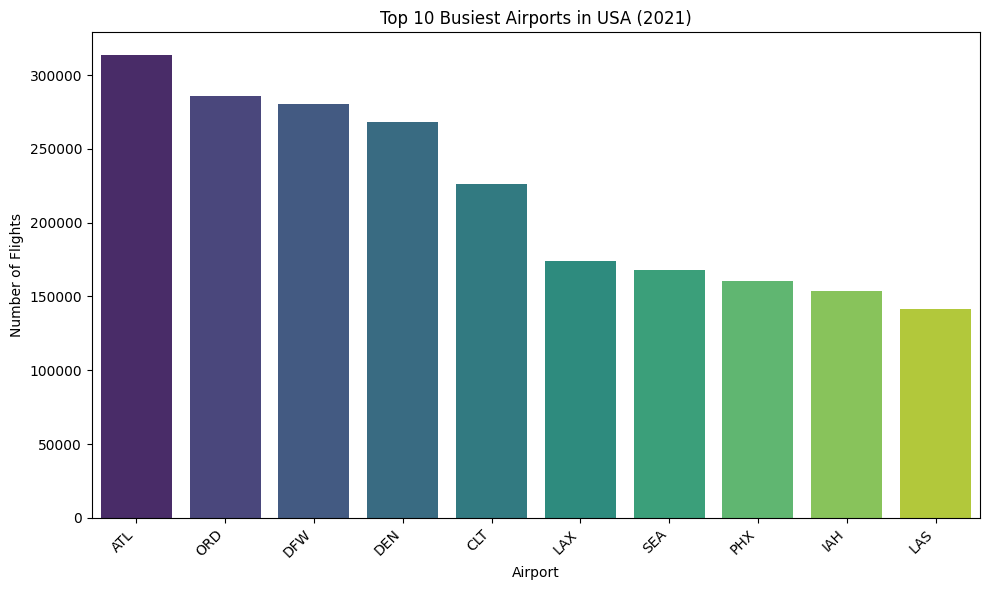

In [14]:
# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=busiest_airports.index, y=busiest_airports.values, palette='viridis')
plt.title('Top 10 Busiest Airports in USA (2021)')
plt.xlabel('Airport')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

ATL (Atlanta) leads as the busiest airport in the USA, indicating a major hub for air traffic.

ORD (Chicago O'Hare), DFW (Dallas/Fort Worth), and DEN (Denver) follow closely, underlining their importance as central nodes in the US air travel network.

The gradual decrease in flight numbers from CLT (Charlotte) to Lax (Los Angles)suggests a tiered structure of airport busyness, with a significant drop-off after the top few.

Airports SEA (Seattle) maintain a high volume of traffic, emphasizing their roles as significant gateways, especially for international and transpacific travel.

Iah(Houston) and  LAS (Las Vegas), while among the top 10, handle notably fewer flights than the leading airports, reflecting their regional prominence versus national centrality.

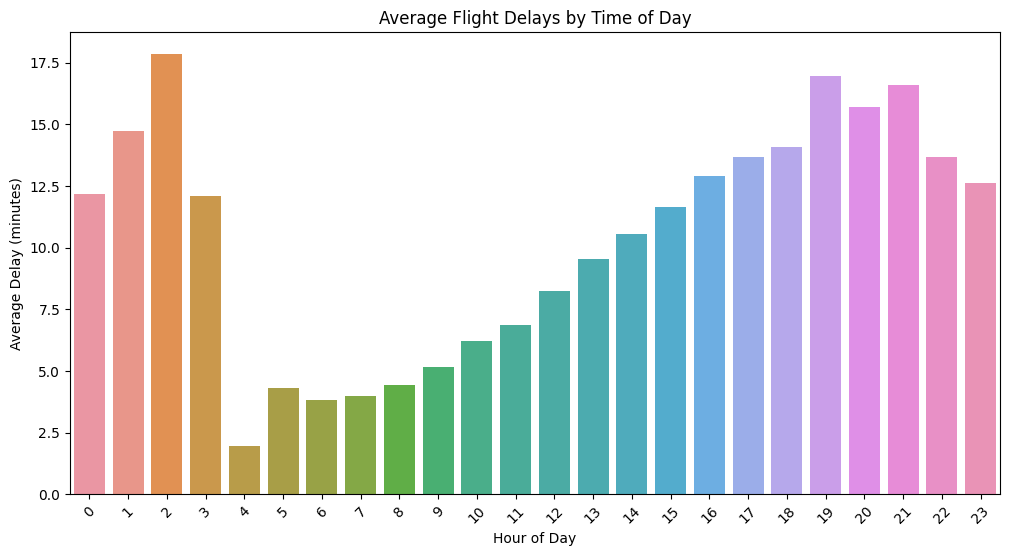

In [15]:
# Convert CRSDepTime to hours
data2['DepHour'] = data2['CRSDepTime'] // 100

# Calculate average delay by hour
average_delays_by_hour = data2.groupby('DepHour')['DepDelay'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=average_delays_by_hour, x='DepHour', y='DepDelay')
plt.title('Average Flight Delays by Time of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Delay (minutes)')
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.show()

From the above bar chart graph it is evident that the flights tend to experience higher average delays later in the day, with delays gradually increasing from the early afternoon hours and peaking in the evening. Early morning flights show lower average delays, suggesting that flying earlier might reduce the likelihood of encountering delays.



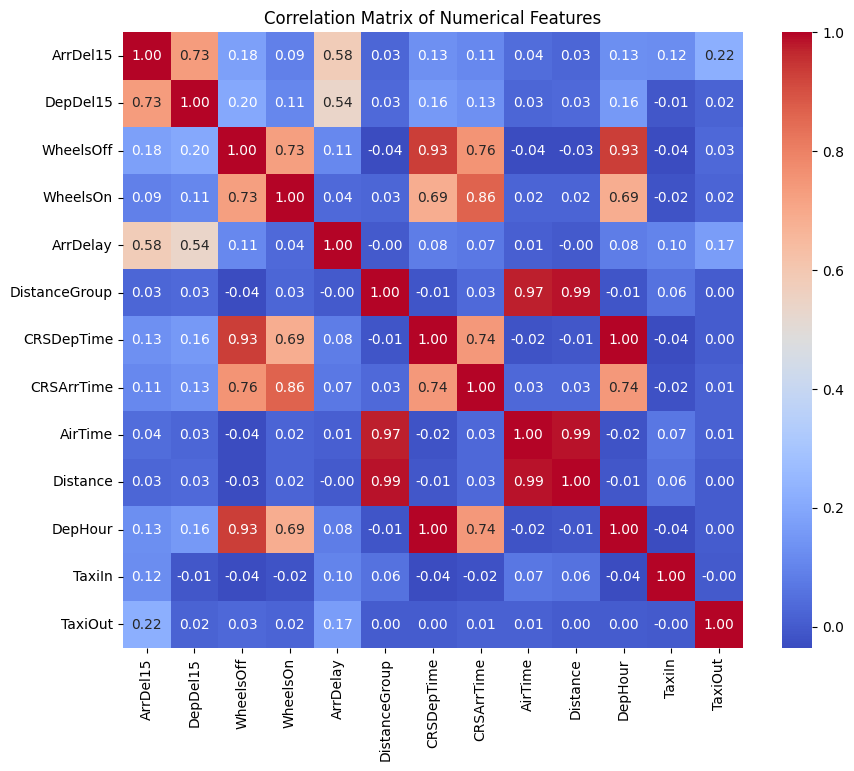

In [16]:
numerical_features = data2[['ArrDel15','DepDel15', 'WheelsOff' , 'WheelsOn','ArrDelay','DistanceGroup','CRSDepTime', 'CRSArrTime', 'AirTime', 'Distance','DepHour', 'TaxiIn','TaxiOut',]]
correlation_matrix = numerical_features.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [17]:
# Convert FlightDate to datetime if not already
data2['FlightDate'] = pd.to_datetime(data2['FlightDate'])

In [18]:
# Add time-based features
data2['hour'] = data2['CRSDepTime'] // 100  # Convert CRSDepTime to hour
data2['day_of_week'] = data2['FlightDate'].dt.day_name()
data2['month'] = data2['FlightDate'].dt.month

<ipython-input-19-f7ca93770f81>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='month', y='DepDelayMinutes', data=data2, ci=None)


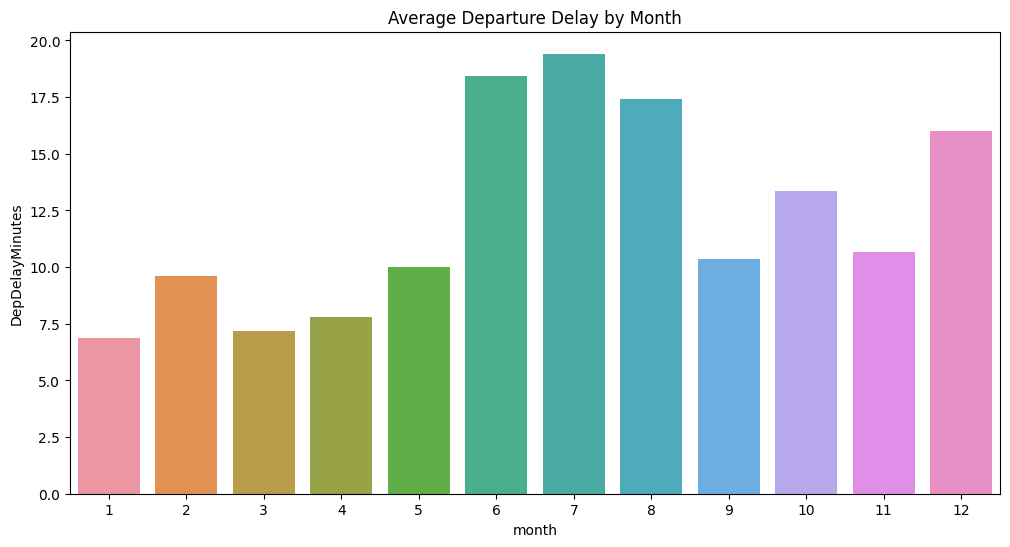

In [19]:
# Plot delays by month
plt.figure(figsize=(12, 6))
sns.barplot(x='month', y='DepDelayMinutes', data=data2, ci=None)
plt.title('Average Departure Delay by Month')
plt.show()

Can see that in the middle of the year (6,7,8) the departure delays are more than any other times of the year

<ipython-input-20-364bdc1ecd56>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='day_of_week', y='DepDelayMinutes', data=data2,


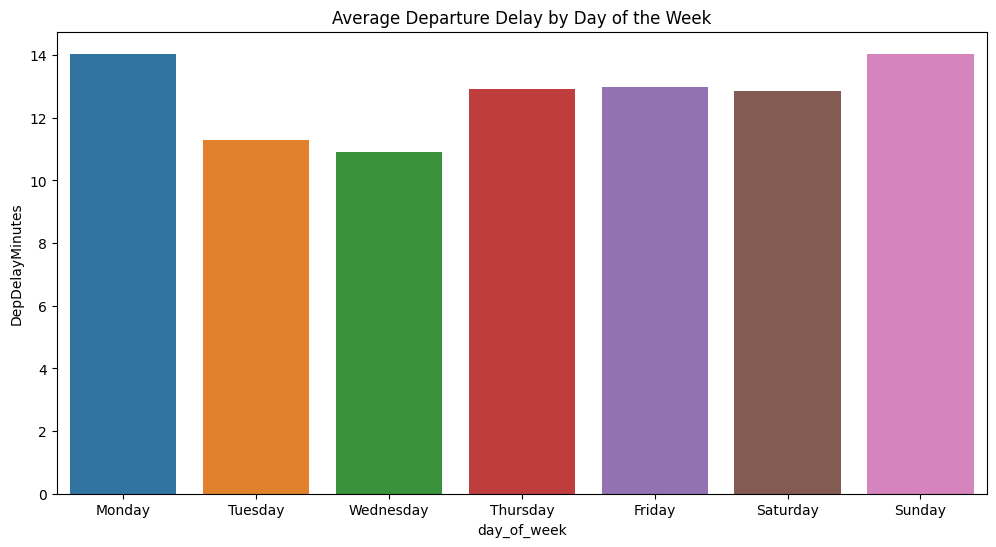

In [20]:
# Plot delays by day of the week
plt.figure(figsize=(12, 6))
sns.barplot(x='day_of_week', y='DepDelayMinutes', data=data2, 
            order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ci=None)
plt.title('Average Departure Delay by Day of the Week')
plt.show()

Most delays are on Monday the day after the weekend and also on Sunday

<ipython-input-21-405a96cbf8b0>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='hour', y='DepDelayMinutes', data=data2, ci=None)


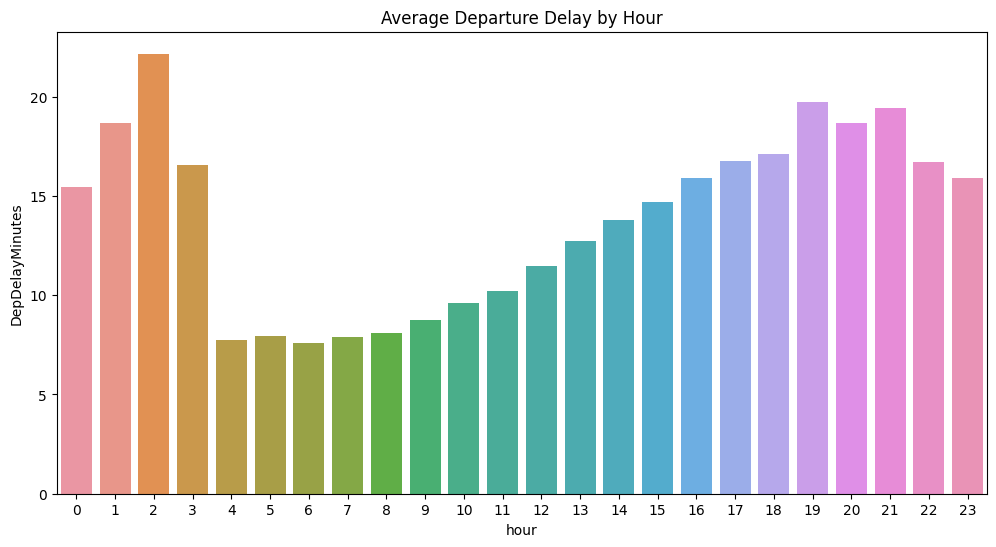

In [21]:
# Plot delays by hour
plt.figure(figsize=(12, 6))
sns.barplot(x='hour', y='DepDelayMinutes', data=data2, ci=None)
plt.title('Average Departure Delay by Hour')
plt.show()

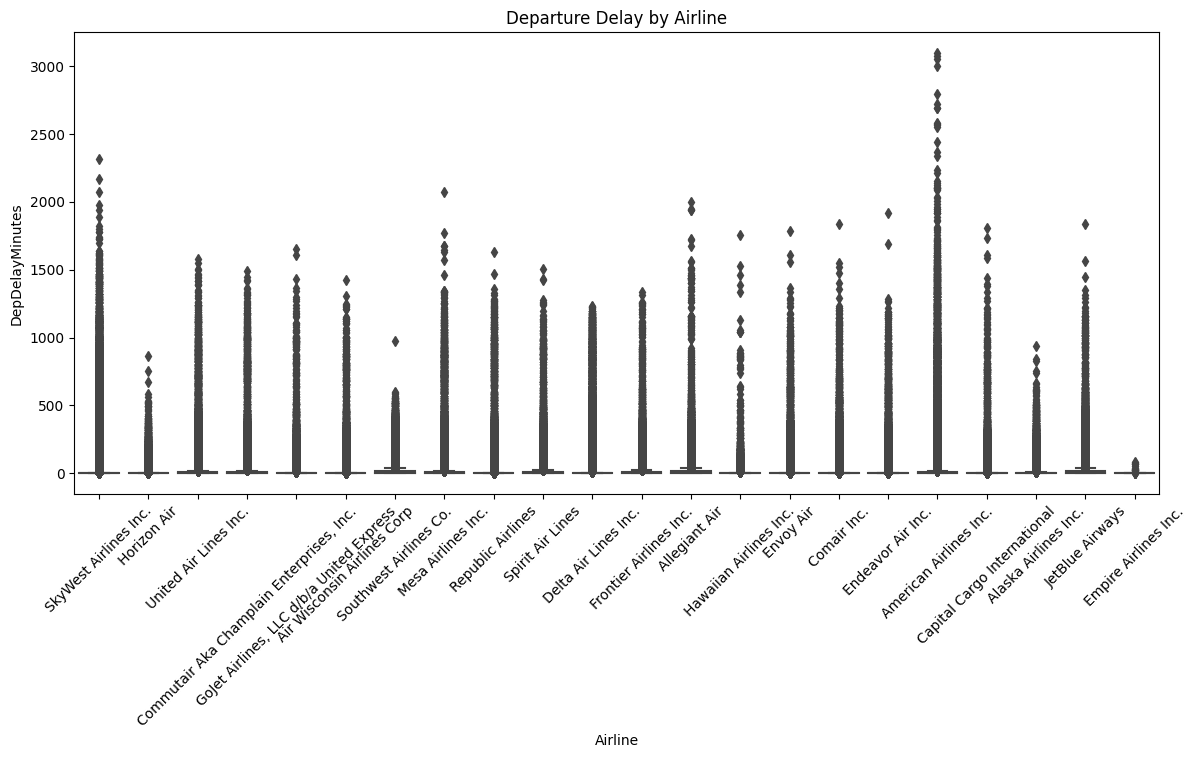

In [22]:
# Delays by airline
plt.figure(figsize=(14, 6))
sns.boxplot(x='Airline', y='DepDelayMinutes', data=data2)
plt.title('Departure Delay by Airline')
plt.xticks(rotation=45)
plt.show()

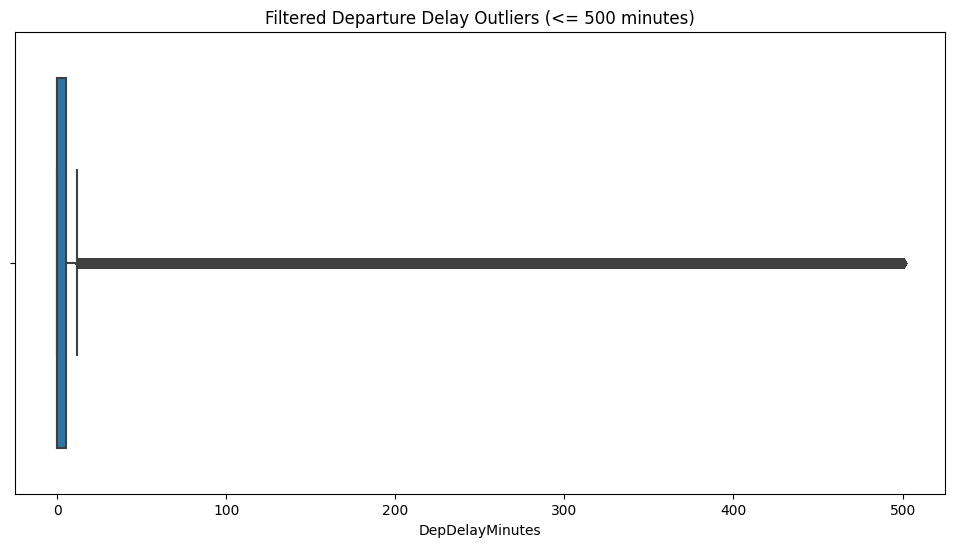

In [23]:
# Filter data to remove extreme outliers (e.g., delays greater than 500 minutes)
filtered_data = data2[data2['DepDelayMinutes'] <= 500]

# Boxplot for filtered data
plt.figure(figsize=(12, 6))
sns.boxplot(x='DepDelayMinutes', data=filtered_data)
plt.title('Filtered Departure Delay Outliers (<= 500 minutes)')
plt.show()


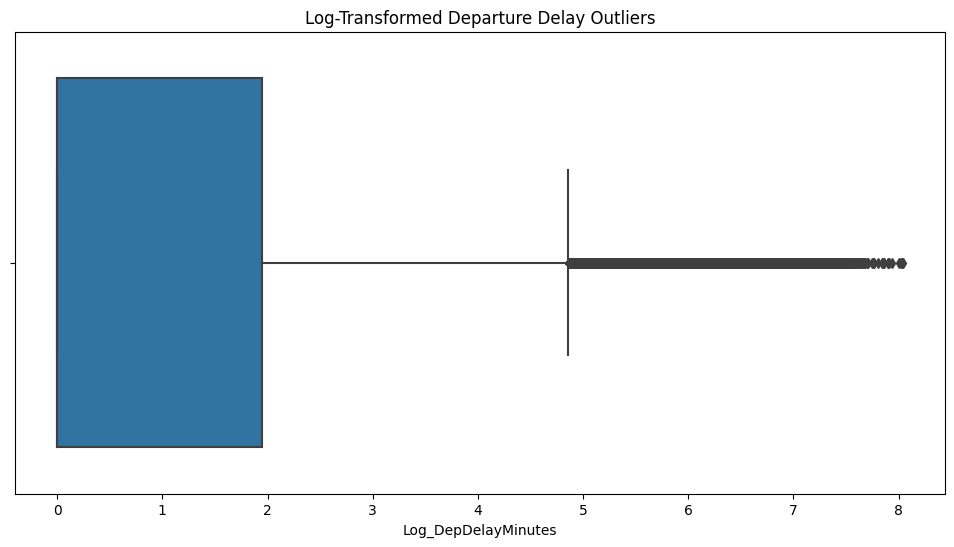

In [24]:
# Add a column for log-transformed delay
data2['Log_DepDelayMinutes'] = np.log1p(data2['DepDelayMinutes'])

# Boxplot with log-transformed data
plt.figure(figsize=(12, 6))
sns.boxplot(x='Log_DepDelayMinutes', data=data2)
plt.title('Log-Transformed Departure Delay Outliers')
plt.show()


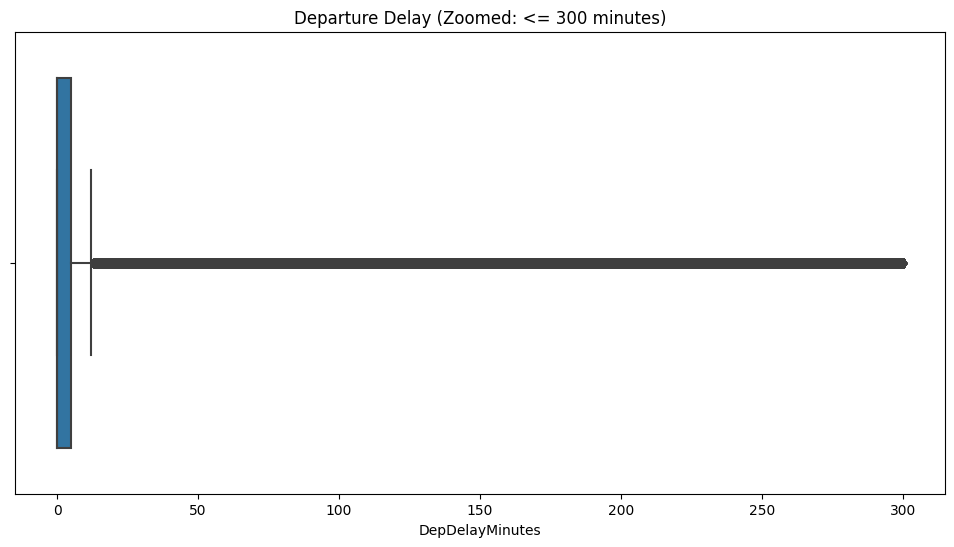

In [25]:
# Zoom in on delays less than or equal to 300 minutes
zoomed_data = data2[data2['DepDelayMinutes'] <= 300]

# Boxplot for zoomed-in range
plt.figure(figsize=(12, 6))
sns.boxplot(x='DepDelayMinutes', data=zoomed_data)
plt.title('Departure Delay (Zoomed: <= 300 minutes)')
plt.show()


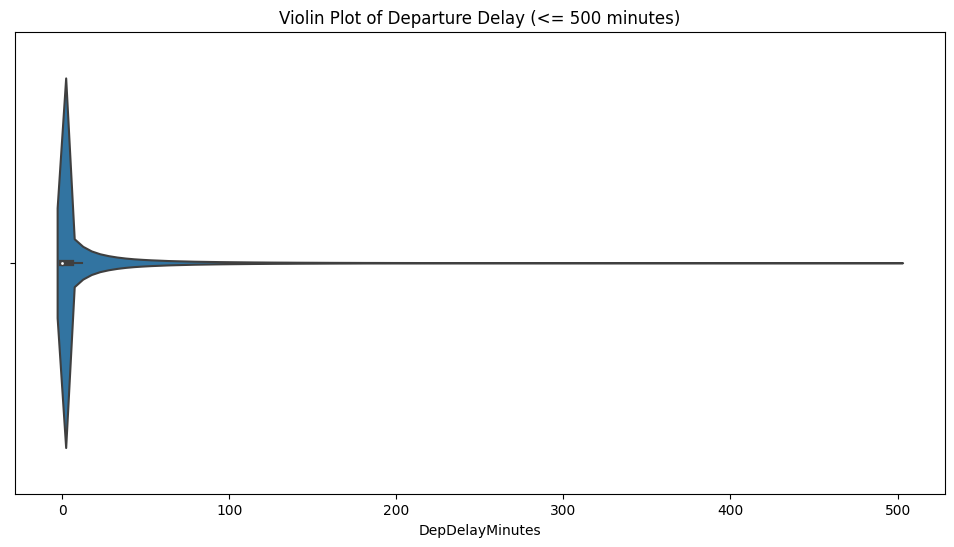

In [26]:
# Violin plot for a better visualization of distribution
plt.figure(figsize=(12, 6))
sns.violinplot(x='DepDelayMinutes', data=filtered_data, scale='width')
plt.title('Violin Plot of Departure Delay (<= 500 minutes)')
plt.show()


In [27]:
# Add binary feature for weekend flights
data2['is_weekend'] = data2['day_of_week'].isin(['Saturday', 'Sunday']).astype(int)

# Create delay ratio by airline
airline_delay_ratio = data2.groupby('Airline')['DepDelayMinutes'].mean().reset_index().rename(columns={'DepDelayMinutes': 'average_delay'})
data2 = data2.merge(airline_delay_ratio, on='Airline', how='left')

# Bucket distances
bins = [0, 500, 1000, 1500, 2000, data2['Distance'].max()]
labels = ['<500', '500-1000', '1000-1500', '1500-2000', '>2000']
data2['distance_bucket'] = pd.cut(data2['Distance'], bins=bins, labels=labels)

# Display the updated dataframe
data2.head()


,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,...,DistanceGroup,DivAirportLandings,DepHour,hour,day_of_week,month,Log_DepDelayMinutes,is_weekend,average_delay,distance_bucket
0,2021-03-03,SkyWest Airlines Inc.,SGU,PHX,False,False,724,714.0,0.0,-10.0,...,2,0.0,7,7,Wednesday,3,0.0,0,13.931217,<500
1,2021-03-03,SkyWest Airlines Inc.,PHX,SGU,False,False,922,917.0,0.0,-5.0,...,2,0.0,9,9,Wednesday,3,0.0,0,13.931217,<500
2,2021-03-03,SkyWest Airlines Inc.,MHT,ORD,False,False,1330,1321.0,0.0,-9.0,...,4,0.0,13,13,Wednesday,3,0.0,0,13.931217,500-1000
3,2021-03-03,SkyWest Airlines Inc.,DFW,TRI,False,False,1645,1636.0,0.0,-9.0,...,4,0.0,16,16,Wednesday,3,0.0,0,13.931217,500-1000
4,2021-03-03,SkyWest Airlines Inc.,PHX,BFL,False,False,1844,1838.0,0.0,-6.0,...,2,0.0,18,18,Wednesday,3,0.0,0,13.931217,<500


Pre Processing steps

In [30]:
# Choosing samples with Origin airport code 'ATL'
specific_origin_airport = ['ATL']  
data2_filtered = data2[data2['Origin'].isin(specific_origin_airport)]
data2_filtered.head()

,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,...,DistanceGroup,DivAirportLandings,DepHour,hour,day_of_week,month,Log_DepDelayMinutes,is_weekend,average_delay,distance_bucket
3342,2021-03-12,SkyWest Airlines Inc.,ATL,ORD,False,False,645,642.0,0.0,-3.0,...,3,0.0,6,6,Friday,3,0.000000,0,13.931217,500-1000
3360,2021-03-12,SkyWest Airlines Inc.,ATL,DEN,False,False,1325,1316.0,0.0,-9.0,...,5,0.0,13,13,Friday,3,0.000000,0,13.931217,1000-1500
3659,2021-03-30,SkyWest Airlines Inc.,ATL,ORD,False,False,630,723.0,53.0,53.0,...,3,0.0,6,6,Tuesday,3,3.988984,0,13.931217,500-1000
3890,2021-03-31,SkyWest Airlines Inc.,ATL,DEN,False,False,1328,1342.0,14.0,14.0,...,5,0.0,13,13,Wednesday,3,2.708050,0,13.931217,1000-1500
4898,2021-03-17,SkyWest Airlines Inc.,ATL,ORD,False,False,645,643.0,0.0,-2.0,...,3,0.0,6,6,Wednesday,3,0.000000,0,13.931217,500-1000


In [31]:
# List of columns to drop (IDs)
id_columns_to_drop = ['DOT_ID_Marketing_Airline', 'DOT_ID_Operating_Airline', 'OriginAirportID',
                      'OriginAirportSeqID', 'OriginCityMarketID', 'DestAirportID', 'DestAirportSeqID',
                      'DestCityMarketID', 'Flight_Number_Marketing_Airline', 'Flight_Number_Operating_Airline',
                      'IATA_Code_Marketing_Airline', 'IATA_Code_Operating_Airline', 'Tail_Number',
                      'Marketing_Airline_Network', 'Operated_or_Branded_Code_Share_Partners',
                   'OriginCityName', 'OriginState', 'DestCityName', 'DestState',
                      'OriginStateName','OriginStateFips','OriginWac'
                  ,'DestStateName','DestStateFips','DestWac','Operating_Airline']

# Drop ID columns from the DataFrame
data2_filtered = data2_filtered.drop(columns=id_columns_to_drop)

# Print data types of the remaining columns
print(data2_filtered.dtypes)

FlightDate              datetime64[ns]
Airline                         object
Origin                          object
Dest                            object
Cancelled                         bool
Diverted                          bool
CRSDepTime                       int64
DepTime                        float64
DepDelayMinutes                float64
DepDelay                       float64
ArrTime                        float64
ArrDelayMinutes                float64
AirTime                        float64
CRSElapsedTime                 float64
ActualElapsedTime              float64
Distance                       float64
Year                             int64
Quarter                          int64
Month                            int64
DayofMonth                       int64
DayOfWeek                        int64
DepDel15                       float64
DepartureDelayGroups           float64
DepTimeBlk                      object
TaxiOut                        float64
WheelsOff                

In [32]:
# Getting total columns after droping columns
columns = data2_filtered.columns
len(columns)

43

In [33]:
# Getting total row after filtering
len(data2_filtered.index)

313287

In [34]:
# Getting the count of unique Airlines that take off and arrive to Atlanta airport. 
airlines = data2_filtered['Airline'].unique()
len(airlines)

14

In [36]:
# Getting unique destination
dest = data2_filtered['Dest'].unique()
len(dest)

159

In [38]:
columns_to_keep = [
    'TaxiIn', 'TaxiOut','ArrDel15','DepDel15','DayofMonth','Month',
    'DepTime' ,'WheelsOff', 'WheelsOn', 'Distance','CRSDepTime','CRSArrTime',
     'Airline','AirTime', 'DepHour'
]

data2_filtered = data2_filtered[columns_to_keep]

In [39]:
data2_filtered.head()

,TaxiIn,TaxiOut,ArrDel15,DepDel15,DayofMonth,Month,DepTime,WheelsOff,WheelsOn,Distance,CRSDepTime,CRSArrTime,Airline,AirTime,DepHour
3342,7.0,15.0,0.0,0.0,12,3,642.0,657.0,747.0,606.0,645,800,SkyWest Airlines Inc.,110.0,6
3360,10.0,15.0,0.0,0.0,12,3,1316.0,1331.0,1452.0,1199.0,1325,1500,SkyWest Airlines Inc.,201.0,13
3659,10.0,12.0,1.0,1.0,30,3,723.0,735.0,805.0,606.0,630,740,SkyWest Airlines Inc.,90.0,6
3890,6.0,17.0,0.0,0.0,31,3,1342.0,1359.0,1503.0,1199.0,1328,1500,SkyWest Airlines Inc.,184.0,13
4898,15.0,14.0,0.0,0.0,17,3,643.0,657.0,747.0,606.0,645,800,SkyWest Airlines Inc.,110.0,6


In [40]:
columns = data2_filtered.columns
print('Total columns - ' + str(len(columns)))

Total columns - 15


In [41]:
# Columns that are in the "hhmm" format
data2_filtered[['CRSDepTime','DepTime','CRSArrTime','WheelsOff',
             'WheelsOn']]

,CRSDepTime,DepTime,CRSArrTime,WheelsOff,WheelsOn
3342,645,642.0,800,657.0,747.0
3360,1325,1316.0,1500,1331.0,1452.0
3659,630,723.0,740,735.0,805.0
3890,1328,1342.0,1500,1359.0,1503.0
4898,645,643.0,800,657.0,747.0
...,...,...,...,...,...
6311725,1920,1925.0,2000,1933.0,1951.0
6311726,645,640.0,810,649.0,750.0
6311727,1100,1227.0,1230,1237.0,1339.0
6311728,1450,1503.0,1615,1512.0,1614.0


In [44]:
time_columns = ['CRSDepTime','DepTime','CRSArrTime','WheelsOff',
                'WheelsOn']

for column in time_columns:
    # Extract hour and minute
    data2_filtered[column + '_hour'] = data2_filtered[column] // 100
    data2_filtered[column + '_minute'] = data2_filtered[column] % 100

    # Apply trigonometric transformations
    data2_filtered[column + '_sin'] = np.sin(2 * np.pi * (data2_filtered[column + '_hour'] * 60 + data2_filtered[column + '_minute']) / (24 * 60))
    data2_filtered[column + '_cos'] = np.cos(2 * np.pi * (data2_filtered[column + '_hour'] * 60 + data2_filtered[column + '_minute']) / (24 * 60))

    # Drop the original columns
    data2_filtered = data2_filtered.drop(columns=[column, column + '_hour', column + '_minute'])

# Print data types of the updated DataFrame
print(data2_filtered.dtypes)

TaxiIn            float64
TaxiOut           float64
ArrDel15          float64
DepDel15          float64
DayofMonth          int64
Month               int64
Distance          float64
Airline            object
AirTime           float64
DepHour             int64
CRSDepTime_sin    float64
CRSDepTime_cos    float64
DepTime_sin       float64
DepTime_cos       float64
CRSArrTime_sin    float64
CRSArrTime_cos    float64
WheelsOff_sin     float64
WheelsOff_cos     float64
WheelsOn_sin      float64
WheelsOn_cos      float64
dtype: object


In [45]:
# checking for duplicates
data2_filtered.duplicated().sum()

0

In [46]:
# drop duplicates
data2_filtered= data2_filtered.drop_duplicates()

In [47]:
# Showing missing values
missing_values = data2_filtered.isnull().sum()
print("Missing Values :")
print(missing_values)

Missing Values :
TaxiIn            2084
TaxiOut           2039
ArrDel15          2670
DepDel15          2005
DayofMonth           0
Month                0
Distance             0
Airline              0
AirTime           2670
DepHour              0
CRSDepTime_sin       0
CRSDepTime_cos       0
DepTime_sin       2005
DepTime_cos       2005
CRSArrTime_sin       0
CRSArrTime_cos       0
WheelsOff_sin     2039
WheelsOff_cos     2039
WheelsOn_sin      2084
WheelsOn_cos      2084
dtype: int64


In [48]:
# count of unique values in target
data2_filtered['ArrDel15'].value_counts()

ArrDel15
0.0    268930
1.0     41687
Name: count, dtype: int64

PIPELINE

In [49]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [51]:
# Define numerical and categorical columns
num_cols = data2_filtered.select_dtypes(include='number').columns.to_list()
cat_cols = data2_filtered.select_dtypes(exclude='number').columns.to_list()

# Remove the target column from numerical columns
num_cols.remove('DepDel15')
num_cols.remove('ArrDel15')

In [52]:
# Create pipelines for numerical and categorical columns
num_pipeline = make_pipeline(SimpleImputer(strategy='mean'), StandardScaler())
cat_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder())

# Use ColumnTransformer to set the estimators and transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, num_cols),
        ('cat', cat_pipeline, cat_cols)
    ],
    remainder='passthrough'
)

In [53]:
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['TaxiIn', 'TaxiOut', 'DayofMonth', 'Month',
                                  'Distance', 'AirTime', 'DepHour',
                                  'CRSDepTime_sin', 'CRSDepTime_cos',
                                  'DepTime_sin', 'DepTime_cos',
                                  'CRSArrTime_sin', 'CRSArrTime_cos',
                                  'WheelsOff_sin', 'WheelsOff_cos',
                                  'WheelsOn_sin', 'WheelsOn_cos']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder())]),
                                 ['Airline'])])

Numerical Pipeline:
SimpleImputer: Missing values are filled with the mean value of the feature.
StandardScaler: Numerical features are scaled to have zero mean and unit variance.
Categorical Pipeline:
SimpleImputer: Missing values are filled with the most frequent value (mode) of the feature.
OneHotEncoder: Categorical features are transformed into binary numbers ( for example: 001,110)

In [54]:
# Apply the preprocessing pipeline on the dataset
data2_prepared = preprocessor.fit_transform(data2_filtered)

# Scikit-learn strips the column headers in most cases, so just add them back on afterward.
feature_names = preprocessor.get_feature_names_out()

data2_prepared = pd.DataFrame(data=data2_prepared, columns=feature_names)

data2_prepared.head()

,num__TaxiIn,num__TaxiOut,num__DayofMonth,num__Month,num__Distance,num__AirTime,num__DepHour,num__CRSDepTime_sin,num__CRSDepTime_cos,num__DepTime_sin,...,cat__Airline_Frontier Airlines Inc.,cat__Airline_JetBlue Airways,cat__Airline_Mesa Airlines Inc.,cat__Airline_Republic Airlines,cat__Airline_SkyWest Airlines Inc.,cat__Airline_Southwest Airlines Co.,cat__Airline_Spirit Air Lines,cat__Airline_United Air Lines Inc.,remainder__ArrDel15,remainder__DepDel15
0,0.160052,-0.020694,-0.426122,-1.100778,-0.086554,0.275491,-1.755239,1.856397,0.164840,1.873159,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.740267,-0.020694,-0.426122,-1.100778,1.150177,1.780672,-0.267849,-0.193195,-0.967584,-0.140514,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.740267,-0.493258,1.622056,-1.100778,-0.086554,-0.055318,-1.755239,1.872663,0.264056,1.799125,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,-0.033353,0.294349,1.735843,-1.100778,1.150177,1.499485,-0.267849,-0.211762,-0.960171,-0.301973,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.707293,-0.178215,0.142816,-1.100778,-0.086554,0.275491,-1.755239,1.856397,0.164840,1.871921,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [56]:
# verifying missing values
missing_values_count = data2_prepared.isnull().sum()
print("Missing Values Count for Each Column:")
print(missing_values_count)

Missing Values Count for Each Column:
num__TaxiIn                               0
num__TaxiOut                              0
num__DayofMonth                           0
num__Month                                0
num__Distance                             0
num__AirTime                              0
num__DepHour                              0
num__CRSDepTime_sin                       0
num__CRSDepTime_cos                       0
num__DepTime_sin                          0
num__DepTime_cos                          0
num__CRSArrTime_sin                       0
num__CRSArrTime_cos                       0
num__WheelsOff_sin                        0
num__WheelsOff_cos                        0
num__WheelsOn_sin                         0
num__WheelsOn_cos                         0
cat__Airline_Alaska Airlines Inc.         0
cat__Airline_American Airlines Inc.       0
cat__Airline_Comair Inc.                  0
cat__Airline_Delta Air Lines Inc.         0
cat__Airline_Endeavor Air Inc.        

We drop the missing values from the 'remainderArrDel15' and 'remainderDepDel15' columns. We cannot fill them up with most freuquent item because 'remainderArrDel15' is target column and for 'remainderDepDel15' there is a chance that it might create the biased model.

In [57]:
data2_prepared = data2_prepared.dropna(subset=['remainder__ArrDel15', 'remainder__DepDel15'])

In [58]:
# verifying missing values
missing_values_count = data2_prepared.isnull().sum()
print("Missing Values Count for Each Column:")
print(missing_values_count)

Missing Values Count for Each Column:
num__TaxiIn                            0
num__TaxiOut                           0
num__DayofMonth                        0
num__Month                             0
num__Distance                          0
num__AirTime                           0
num__DepHour                           0
num__CRSDepTime_sin                    0
num__CRSDepTime_cos                    0
num__DepTime_sin                       0
num__DepTime_cos                       0
num__CRSArrTime_sin                    0
num__CRSArrTime_cos                    0
num__WheelsOff_sin                     0
num__WheelsOff_cos                     0
num__WheelsOn_sin                      0
num__WheelsOn_cos                      0
cat__Airline_Alaska Airlines Inc.      0
cat__Airline_American Airlines Inc.    0
cat__Airline_Comair Inc.               0
cat__Airline_Delta Air Lines Inc.      0
cat__Airline_Endeavor Air Inc.         0
cat__Airline_Envoy Air                 0
cat__Airline_Fronti

In [59]:
# data types of the columns
data_types = data2_prepared.dtypes
print("Data Types of Columns:")
print(data_types)

Data Types of Columns:
num__TaxiIn                            float64
num__TaxiOut                           float64
num__DayofMonth                        float64
num__Month                             float64
num__Distance                          float64
num__AirTime                           float64
num__DepHour                           float64
num__CRSDepTime_sin                    float64
num__CRSDepTime_cos                    float64
num__DepTime_sin                       float64
num__DepTime_cos                       float64
num__CRSArrTime_sin                    float64
num__CRSArrTime_cos                    float64
num__WheelsOff_sin                     float64
num__WheelsOff_cos                     float64
num__WheelsOn_sin                      float64
num__WheelsOn_cos                      float64
cat__Airline_Alaska Airlines Inc.      float64
cat__Airline_American Airlines Inc.    float64
cat__Airline_Comair Inc.               float64
cat__Airline_Delta Air Lines Inc.    

Notes:

Columns prefixed with num__ are numerical features.
Columns prefixed with cat__ are one-hot encoded categorical features.
The column 'remainderArrDel15', 'remainderDepDel15' are the binary features for ArrDel15 and DepDel15 respectively.
The columns representing binary features (ArrDel15 and DepDel15) should ideally be of integer type (0 or 1) instead of float. We convert these columns to integer type as they are supposed to represent binary values.

In [60]:
# Converting target column to Int
# Convert binary columns to integer type
data2_prepared['remainder__ArrDel15'] = data2_prepared['remainder__ArrDel15'].astype(int)
data2_prepared['remainder__DepDel15'] = data2_prepared['remainder__DepDel15'].astype(int)

In [61]:
data2_prepared.shape

(310617, 33)

SELECTING MODELS

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Define X (features) and y (target)
X = data2_prepared.drop(['remainder__ArrDel15'],axis=1)
y = data2_prepared['remainder__ArrDel15']

In [63]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
X_train.shape, y_train.shape,X_test.shape,y_test.shape

((248493, 32), (248493,), (62124, 32), (62124,))

RANDOM FORREST 

In [66]:
# Train Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print("Random Forest Accuracy:", rf_accuracy)

Random Forest Accuracy: 0.9701564612710064


LOGISTIC REGRESSION

In [67]:
# Train Logistic Regression model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_pred)
print("Logistic Regression Accuracy:", lr_accuracy)

Logistic Regression Accuracy: 0.9467516579743739


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


KNN

In [68]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Ensure X_test is a numpy array and is C-contiguous
X_test = np.asarray(X_test, order='C')

knn_model = KNeighborsClassifier(n_neighbors=3) 
knn_model.fit(X_train, y_train)

# Attempt prediction again with the modified X_test
knn_pred = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)

print("kNN Accuracy:", knn_accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


kNN Accuracy: 0.9387032386839225


Evaluating the models

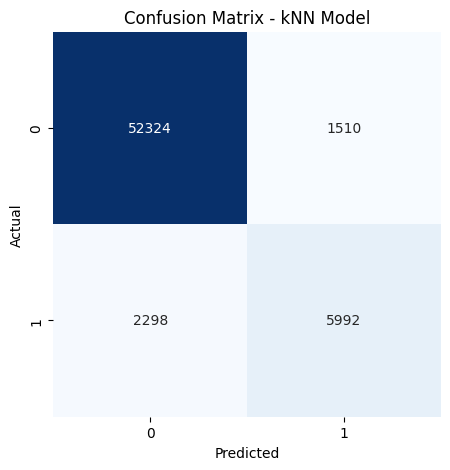

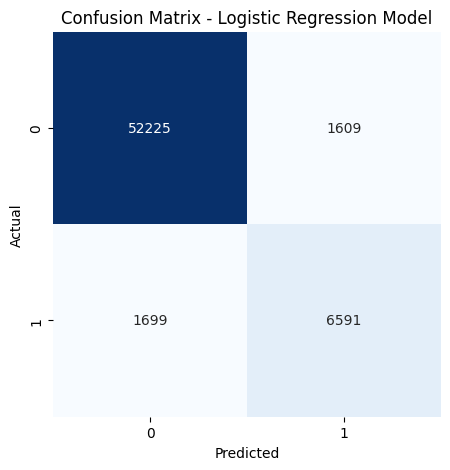

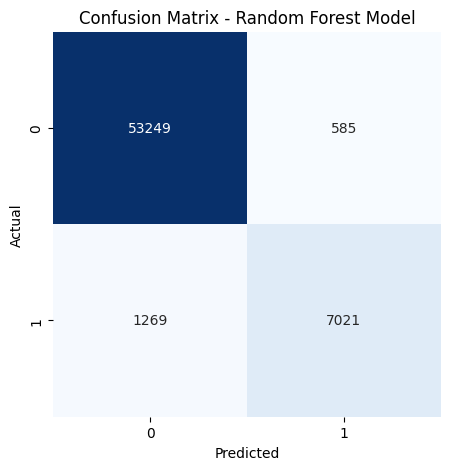

In [69]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
# Define function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 5))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Plot confusion matrix for kNN model
plot_confusion_matrix(y_test, knn_pred, title='Confusion Matrix - kNN Model')

# Plot confusion matrix for Logistic Regression model
plot_confusion_matrix(y_test, lr_pred, title='Confusion Matrix - Logistic Regression Model')

# Plot confusion matrix for Random Forest model
plot_confusion_matrix(y_test, rf_pred, title='Confusion Matrix - Random Forest Model')

classification report

In [71]:
# Classification report for kNN model
print("Classification Report - kNN Model:")
print(classification_report(y_test, knn_pred))

# Classification report for Logistic Regression model
print("\nClassification Report - Logistic Regression Model:")
print(classification_report(y_test, lr_pred))   

# Classification report for Random Forest model
print("\nClassification Report - Random Forest Model:")
print(classification_report(y_test, rf_pred))

Classification Report - kNN Model:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96     53834
           1       0.80      0.72      0.76      8290

    accuracy                           0.94     62124
   macro avg       0.88      0.85      0.86     62124
weighted avg       0.94      0.94      0.94     62124


Classification Report - Logistic Regression Model:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     53834
           1       0.80      0.80      0.80      8290

    accuracy                           0.95     62124
   macro avg       0.89      0.88      0.88     62124
weighted avg       0.95      0.95      0.95     62124


Classification Report - Random Forest Model:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     53834
           1       0.92      0.85      0.88      8290

    accuracy                           0.97     6

Plotting bar chart for performance Metrics for Each Model

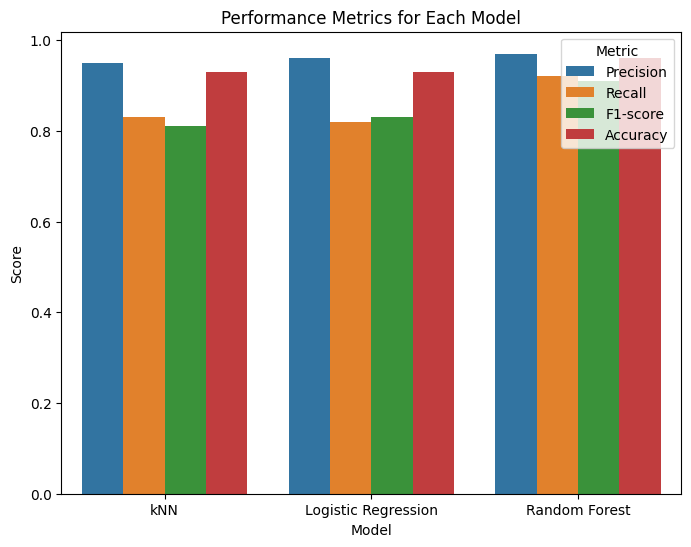

In [73]:
# Data
data = {
    'Model': ['kNN', 'Logistic Regression', 'Random Forest'],
    'Precision': [0.95, 0.96, 0.97],
    'Recall': [0.83, 0.82, 0.92],
    'F1-score': [0.81, 0.83, 0.91],
    'Accuracy': [0.93, 0.93, 0.96]
}

data2_plot = pd.DataFrame(data)

# Melt the DataFrame
data2_melted = pd.melt(data2_plot, id_vars='Model', var_name='Metric', value_name='Score')

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(data=data2_melted, x='Model', y='Score', hue='Metric')
plt.title('Performance Metrics for Each Model')
plt.ylabel('Score')
plt.xlabel('Model')
plt.legend(title='Metric')
plt.show()

Plotting ROC curve

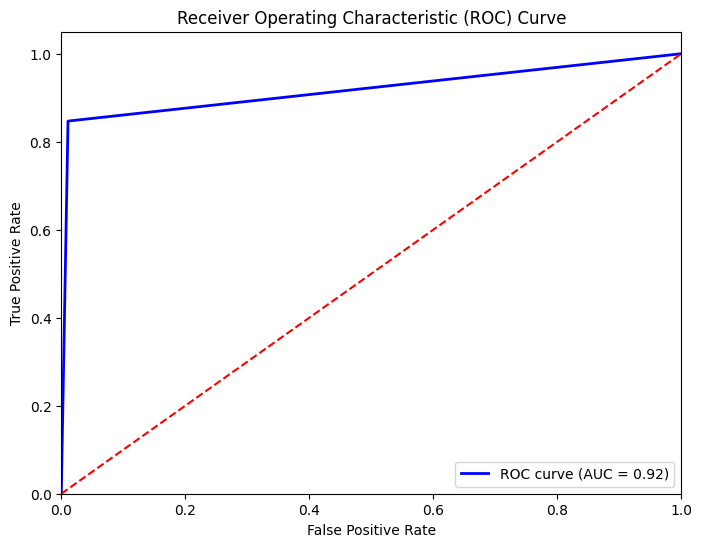

In [74]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, rf_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Plotting precision-recall curve

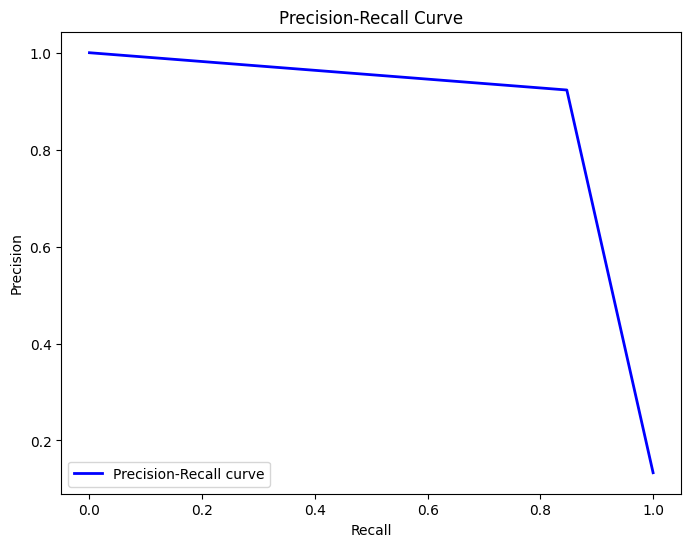

In [75]:
from sklearn.metrics import precision_recall_curve

# Calculate precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, rf_pred)

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

High Precision (0.97 for class 0 and 0.92 for class 1): This means the model rarely predicts a positive case that's actually negative. There are very few false positives.
High Recall (0.98 for class 0 and 0.89 for class 1): This means the model identifies most of the actual positive cases. There are few false negatives.
High Accuracy (0.96): This indicates the model performs well on both positive and negative classifications.
But there might be a chance that model might be overfitting. we need to check this and tune it accordingly.

FINE TUNNING

In [76]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define a smaller parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True]
}

# Create a Random Forest classifier
rf_model = RandomForestClassifier()

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_grid, n_iter=10,
                                   scoring='accuracy', cv=5, verbose=2, random_state=42, n_jobs=-1)


# random_search.fit(X_train[:10000], y_train[:10000])

# Fit the RandomizedSearchCV object to the full training data
random_search.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params = random_search.best_params_
best_model = random_search.best_estimator_

# Evaluate the best model on the test data
best_pred = best_model.predict(X_test)
best_accuracy = accuracy_score(y_test, best_pred)
print("Best Random Forest Accuracy:", best_accuracy)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Best Random Forest Accuracy: 0.9701403644324255
